In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Load and preprocess data
df = pd.read_csv("/content/monthly-milk-production-pounds.csv", index_col='Month', parse_dates=True)
df.index.freq = 'MS'
scaler = MinMaxScaler()
train, test = scaler.fit_transform(df.iloc[:-12]), scaler.transform(df.iloc[-12:])

# Create TimeseriesGenerator
gen = TimeseriesGenerator(train, train, length=12, batch_size=1)

#RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([SimpleRNN(200, activation='relu', input_shape=(12, 1)), Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(gen, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  4/144 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1716

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0497
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0085
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0112
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0101
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0043
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0045
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0025
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0035
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0014
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0020
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-2-fb4b05583580>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predictions'] = preds


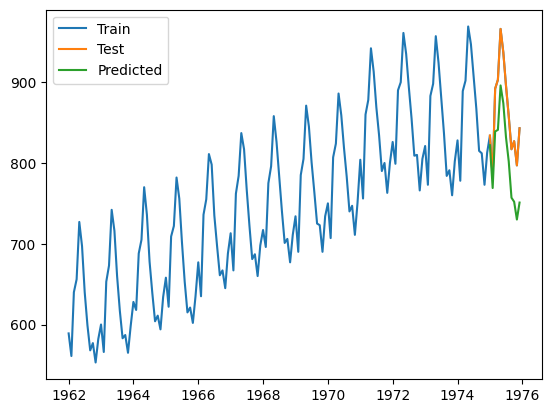

In [ ]:
# Predicting future values
preds = []
current_batch = train[-12:].reshape(1, 12, 1)
for _ in range(len(test)):
    pred = model.predict(current_batch)[0]
    preds.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

# Inverse transform predictions
preds = scaler.inverse_transform(preds).astype(int)

# Plot
df_test = df.iloc[-12:]
df_test['Predictions'] = preds
plt.plot(df.index, df['production'], label='Train')
plt.plot(df_test.index, df_test['production'], label='Test')
plt.plot(df_test.index, df_test['Predictions'], label='Predicted')
plt.legend()
plt.show()

In [ ]:
#LSTM
from tensorflow.keras.layers import LSTM

model = Sequential([LSTM(200, activation='relu', input_shape=(12, 1)), Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(gen, epochs=50)

Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0728
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0190
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0233
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0141
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0177
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0091
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0066
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0091
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0042
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0029
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0031
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0038
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0034
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0028
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s

In [ ]:
#GRU
from tensorflow.keras.layers import GRU

model = Sequential([GRU(200, activation='relu', input_shape=(12, 1)), Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(gen, epochs=50)

Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0915
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0241
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0188
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0152
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0123
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0086
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0061
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0068
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0059
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0062
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0050
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0052
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0048
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0041
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-20-fb4b05583580>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predictions'] = preds


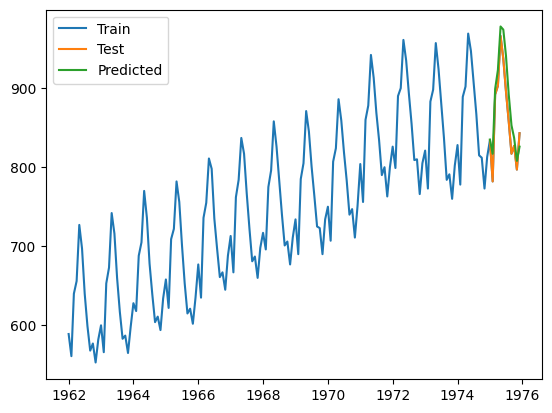

In [ ]:
# Predicting future values
preds = []
current_batch = train[-12:].reshape(1, 12, 1)
for _ in range(len(test)):
    pred = model.predict(current_batch)[0]
    preds.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

# Inverse transform predictions
preds = scaler.inverse_transform(preds).astype(int)

# Plot
df_test = df.iloc[-12:]
df_test['Predictions'] = preds
plt.plot(df.index, df['production'], label='Train')
plt.plot(df_test.index, df_test['production'], label='Test')
plt.plot(df_test.index, df_test['Predictions'], label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Assuming `df_test['production']` is the true values and predictions from models are available
y_true = df_test['production'].values  # True test values

# Example predictions (replace with actual predictions from your models)
preds_rnn = np.random.rand(len(y_true))  # Replace with actual RNN predictions
preds_lstm = np.random.rand(len(y_true))  # Replace with actual LSTM predictions
preds_gru = np.random.rand(len(y_true))  # Replace with actual GRU predictions

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Calculate metrics for each model
metrics_rnn = calculate_metrics(y_true, preds_rnn)
metrics_lstm = calculate_metrics(y_true, preds_lstm)
metrics_gru = calculate_metrics(y_true, preds_gru)

# Create a DataFrame to display the metrics in a table format
metrics_df = pd.DataFrame({
    'Model': ['RNN', 'LSTM', 'GRU'],
    'MSE': [metrics_rnn[0], metrics_lstm[0], metrics_gru[0]],
    'MAE': [metrics_rnn[1], metrics_lstm[1], metrics_gru[1]],
    'R-squared': [metrics_rnn[2], metrics_lstm[2], metrics_gru[2]]
})

# Display the performance metrics
print(metrics_df)


  Model            MSE         MAE   R-squared
0   RNN  746066.986847  862.060006 -253.278412
1  LSTM  746431.228468  862.255372 -253.402555
2   GRU  746152.216586  862.104854 -253.307460


In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow